# Indian Patients - Liver Disease Analysis

## <i>Description of Dataset</i>

The given dataset is related to Indian patients who have been tested for a liver disease. Based on chemical compounds (bilrubin,albumin,protiens,alkaline phosphatase) present in human body and tests like SGOT, SGPT the outcome mentioned is whether person is a patient i.e, whether he needs to be diagnosed further or not.

## <i>List of Attributes</i>

<i><b>Age</b></i> - Age of the person <br>
<i><b>Gender</b></i> - Gender of the person <br>
<i><b>Total_Bilirubin</b></i> - Blood test that measures the total amount of Bilirubin present in liver (mg/dL) <br>
<i><b>Direct_Bilirubin</b></i> - Blood test that measures the water soluble Bilirubin present in liver (mg/dL) <br>
<i><b>Alkaline_Phosphotase (ALP)</b></i> - Enzyme found in blood which helps to breakdown proteins (IU/L) <br>
<i><b>Alamine_Aminotransferase (SGPT)</b></i> - Test that measures the level of enzymes made by cells in your liver (IU/L) <br>
<i><b>Aspartate_Aminotransferase (SGOT)</b></i> - Test that measures how much of the liver enzymes are present in the blood (IU/L) <br>
<i><b>Total_Protiens</b></i> - The total protein test measures the total amount albumin and globulin in human body (g/dL) <br>
<i><b>Albumin</b></i> - Albumin is a type of protein which is made by the liver (g/dL) <br>
<i><b>Albumin_and_Globulin_Ratio</b></i> - Ratio of two classes (albumin and globulin) of protiens present in blood <br>
<i><b>Class</b></i> - Whether the person has liver disease or not 

## <i>Objective</i>

The objective of this project is to perform data cleansing, and required transformations and build a predictive model which will be able to predict most of the cases accurately. The basic goal is to understand that the person is a patient or not.

### Import Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

### Reading data

In [2]:
warnings.filterwarnings("ignore") # to ignore warnings

# Import data 
ilpd_df = pd.read_csv(r"C:\Users\intel\Desktop\Python\IndianLiverPatientData.csv",header = 0)

# Dimensions of data
ilpd_df.shape

(583, 11)

In [3]:
# First 5 columns of data
ilpd_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No


## Data Pre-processing 

### 1. Checking for any null values are present

In [4]:
ilpd_df.isnull().sum()

Age                            0
Gender                        20
Total_Bilirubin                0
Direct_Bilirubin               0
Alkaline_Phosphotase           0
Alamine_Aminotransferase       0
Aspartate_Aminotransferase     0
Total_Protiens                15
Albumin                        0
Albumin_and_Globulin_Ratio     4
Class                          0
dtype: int64

As we can see there are null values present in Gender, Total_protiens, Albumin_and_Globulin_Ratio.

### 2. Replacing the null values

In [5]:
ilpd_df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Class                          object
dtype: object

Here we will replace the null values of Gender(dtype = object) with mode and Total_protiens, Albumin_and_Globulin_Ratio (dtype = float64) with median

In [6]:
ilpd_df1=ilpd_df.copy()
for x in ilpd_df1.columns[:]:
    if ilpd_df1[x].dtype=='object':
        ilpd_df1[x].fillna(ilpd_df1[x].mode()[0],inplace=True)
    elif ilpd_df1[x].dtype=='int64' or ilpd_df1[x].dtype=='float64':
        ilpd_df1[x].fillna(ilpd_df1[x].median(), inplace=True)

ilpd_df1.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Class                         0
dtype: int64

### 3. Checking for any outliers are present

In [7]:
print(ilpd_df1.describe(np.arange(0.9, 0.99, 0.01), include='all'))#summary

               Age Gender  Total_Bilirubin  Direct_Bilirubin  \
count   583.000000    583       583.000000        583.000000   
unique         NaN      2              NaN               NaN   
top            NaN   Male              NaN               NaN   
freq           NaN    441              NaN               NaN   
mean     44.746141    NaN         3.298799          1.486106   
std      16.189833    NaN         6.209522          2.808498   
min       4.000000    NaN         0.400000          0.100000   
50%      45.000000    NaN         1.000000          0.300000   
90%      66.000000    NaN         7.860000          4.080000   
91%      66.000000    NaN         8.900000          4.500000   
92%      67.440000    NaN        10.900000          5.144000   
93%      69.260000    NaN        12.256000          6.252000   
94%      70.000000    NaN        14.816000          7.608000   
95%      72.000000    NaN        16.350000          8.400000   
96%      72.720000    NaN        18.2880

We can clearly see that Alkaline Phosphotase has many outliers (maximum value of AP is 2110 but 98% values range around 1103), Alamine_Aminotransferase (maximum value of ALT is 2000 but 98% values range around 549), Apartate_Aminotransferase (maximum value of ASP is 4929 but 98% values range around 846)

In [8]:
#Taking 97% of values to treat the outliers
ilpd_df2 = ilpd_df1.loc[ilpd_df1["Alkaline_Phosphotase"] < 909]
ilpd_df3 = ilpd_df2.loc[ilpd_df2["Alamine_Aminotransferase"] < 500]

# To check whether the outliers are removed or not
print(ilpd_df3.describe(np.arange(0.9, 0.99, 0.01), include='all'))

               Age Gender  Total_Bilirubin  Direct_Bilirubin  \
count   554.000000    554       554.000000        554.000000   
unique         NaN      2              NaN               NaN   
top            NaN   Male              NaN               NaN   
freq           NaN    420              NaN               NaN   
mean     44.599278    NaN         3.044224          1.356498   
std      16.215381    NaN         6.034369          2.687107   
min       4.000000    NaN         0.400000          0.100000   
50%      45.000000    NaN         1.000000          0.300000   
90%      65.700000    NaN         6.800000          3.270000   
91%      66.000000    NaN         7.323000          4.000000   
92%      66.760000    NaN         8.456000          4.300000   
93%      69.290000    NaN        10.316000          5.058000   
94%      70.000000    NaN        12.592000          6.892000   
95%      72.000000    NaN        15.340000          7.940000   
96%      72.000000    NaN        17.2280

### 4. Checking for any multicolinearity

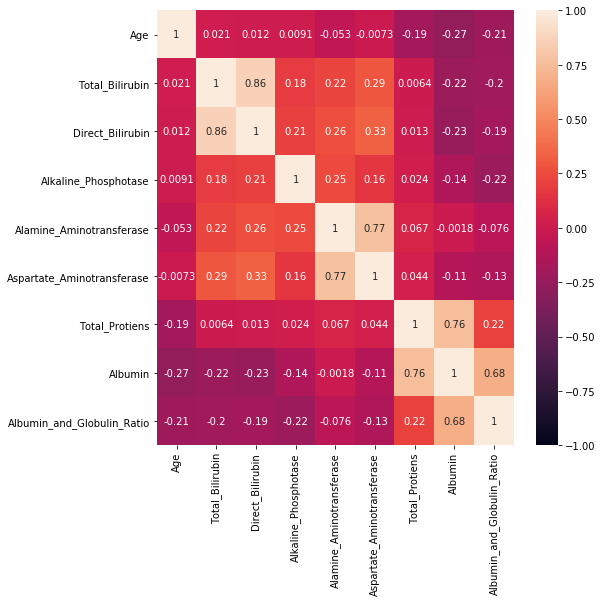

In [9]:
x = ilpd_df3[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase', 'Alamine_Aminotransferase',
         'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin','Albumin_and_Globulin_Ratio']]
y = ilpd_df3[['Class']]
cor=x.corr(method="pearson")
plt.figure(figsize=(8, 8))
sns.heatmap(cor,vmax=1.0,vmin=-1.0,annot=True)

Observing correlation between the data we can say that we are going to removing following columns:-

1. Albumin: - As albumin is correlated to two of the variables that is albumin_and_globulin_ratio and total_proteins we'll eliminate Albumin.<br>
2. Direct_Bilirubin:- As we can observe total_bilirubin and Direct_bilirubin are correlated   but total_bilirubin considers both direct_bilirubin and indirect_bilirubin, so keeping total_bilirubin and eliminating direct_bilirubin.<br>
3. Aspartate_Aminotransferase:- Between Alamine_Aminotransferase(ALT) and  Aspartate_Aminotransferase(AST), the ALT is more specific to liver compare to AST. As we are predicting the liver diseases we will check for ALT rather then AST.

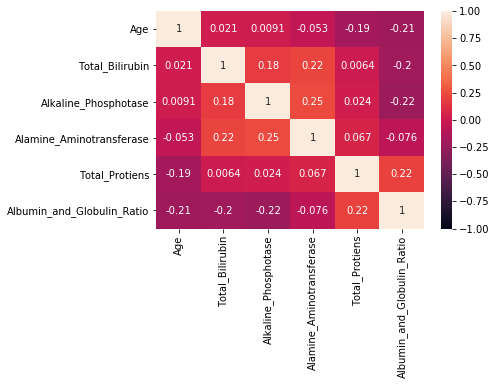

In [10]:
x = ilpd_df3[['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase','Total_Protiens',
         'Albumin_and_Globulin_Ratio']]
cor=x.corr(method="pearson")
sns.heatmap(cor,vmax=1.0,vmin=-1.0,annot=True)

In [11]:
ilpd_df4 = pd.concat([x, y], axis=1)

### 5. Log transformation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026FB05DF988>,
      dtype=object)

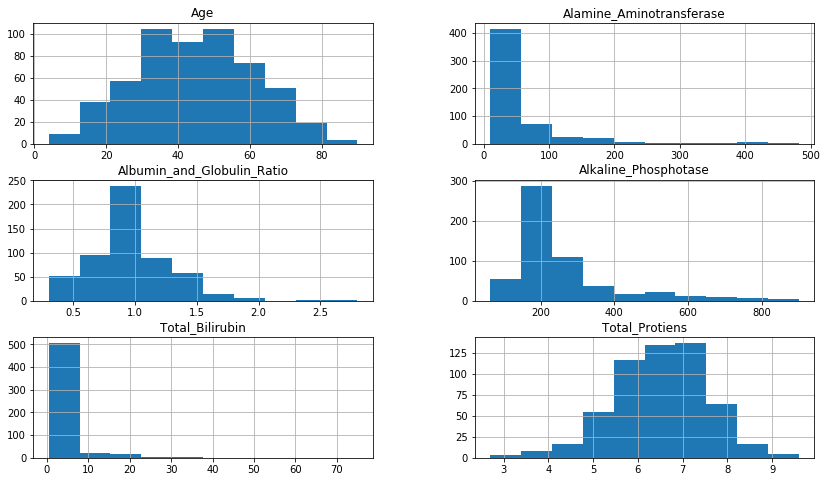

In [12]:
# Split the data into features and target label(Class)
disease_initial = ilpd_df4['Class']
features_initial = ilpd_df4.drop('Class', axis = 1)

# Visualizing skewed continuous features of original data
features_initial.hist(figsize=(14,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026FB147A188>,
      dtype=object)

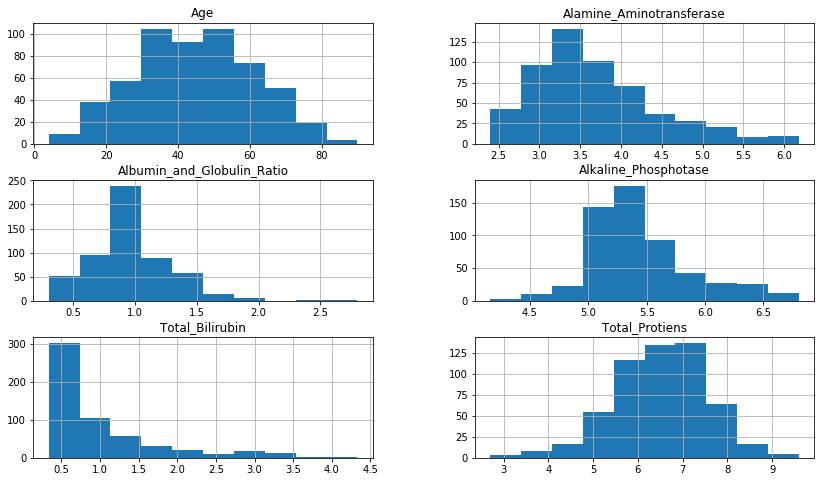

In [13]:
# Skewed features are Almaine_Aminotransferase, Alkaline_Phosphotase, Total_Bilirubin
# Log-transforming the skewed features
skewed = ['Alamine_Aminotransferase', 'Alkaline_Phosphotase','Total_Bilirubin']
features_initial[skewed] = ilpd_df4[skewed].apply(lambda x: np.log(x + 1))
ilpd_df4[skewed] = features_initial[skewed]

ilpd_df4.hist(figsize=(14,8))

### EDA
### Age wise Class distribution

Text(0.5, 1.0, 'Age wise Class distribution')

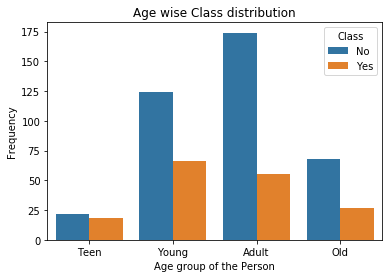

In [14]:
ilpd_df4['Age Group'] = pd.cut(ilpd_df4['Age'],bins = [0,20,40,60,100],
                            labels=['Teen','Young','Adult','Old'])
sns.countplot('Age Group',hue = 'Class',data = ilpd_df4)
plt.xlabel('Age group of the Person')
plt.ylabel('Frequency')
plt.title('Age wise Class distribution')

In the Age wise class distribution we can conclude that the young group (i.e. 20-40 yrs of age) have higher chances of getting a liver disease followed by the adult (i.e. 40-60 yrs of age) and the old (i.e. 60 & above)

### Gender wise Class distribution

Text(0.5, 1.0, 'Gender wise Class distribution')

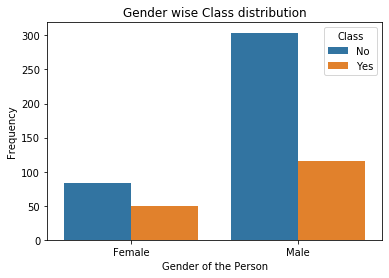

In [15]:
sns.countplot('Gender',hue = 'Class',data = ilpd_df4)
plt.xlabel('Gender of the Person')
plt.ylabel('Frequency')
plt.title('Gender wise Class distribution')

In Gender wise class distribution we can conclude that there are higher chances of male patients getting a liver disease than that of female patients

### 6. Checking  Class Imbalance

In [16]:
colname =["Gender","Class"]

le={}
for value in colname:
    le[value]=preprocessing.LabelEncoder()
for value in colname:
    ilpd_df4[value]=le[value].fit_transform(ilpd_df4[value])
    
print(ilpd_df4['Class'].value_counts())

0    388
1    166
Name: Class, dtype: int64


As we can see that there is a class imbalancing in our target variable for that we have to resample

In [17]:
No = ilpd_df4[ilpd_df4.Class==0]
Yes = ilpd_df4[ilpd_df4.Class==1]

up_sample = resample(Yes, replace=True, n_samples=388, random_state=0)

ilpd_df4 = pd.concat([No, up_sample]) 
ilpd_df4['Class'].value_counts()

1    388
0    388
Name: Class, dtype: int64

### 7. Scaling the features

Standardization (subtracting mean and scaling variance) is required for many methods like regularized linear regression, K-NearestNeighbors. One can use following scaling methods -

MinMaxScaler - This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one.

StandardScaler - It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. It arranges the data in a standard normal distribution.

We use StandardScaler here for scaling our data.

In [18]:
X = ilpd_df4[['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase','Total_Protiens',
               'Albumin_and_Globulin_Ratio']]
Y = ilpd_df4[['Class']]

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
print(X)

[[ 1.29118127 -1.80012143 -0.61851954 ... -1.10457741  0.27026155
  -0.24263569]
 [ 1.11123215  0.55551808  2.49334351 ...  0.79978582  0.92681823
  -0.74997228]
 [ 1.11123215  0.55551808  1.91718587 ...  0.70960169  0.45784917
  -0.27434422]
 ...
 [-1.94790277  0.55551808 -0.61851954 ... -0.44768779  0.55164298
   1.34279117]
 [-1.88791973  0.55551808 -0.52711287 ...  0.36928478  0.17646774
   0.39153506]
 [ 0.81131696  0.55551808 -0.35862231 ... -0.8738131  -1.23043943
   0.70862043]]


### Splitting the data in train and test

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(620, 7)
(156, 7)
(620, 1)
(156, 1)


## Data Modeling

### Supervised learning Algorithms

1. Logistic Regression: Since the outcome is binary at the core of this method is a logistic or sigmoid function that quantifies the difference between each prediction and its corresponding true value.
2. k-Nearest Neighbors: It uses the k closest neighbors of a data point to determine which class should that data point belong to.
3. Support Vector Machine: SVM aims to find an optimal hyperplane that separates the data into different classes.
4. Random Forest Classifier: It comes under the category of ensemble methods. It employs ‘bagging’ method to draw a random subset from the data, and train a Decision Tree on that.
5. XGBoost Classifier : Boosting process slowly learns from data and tries to improve its prediction in subsquent iterations.


### <i>Logistic Regression</i>

In [20]:
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
y_pred_LR=classifier.predict(x_test)
print(y_pred_LR)

[1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1
 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0
 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0
 1 0 0 1 1 0 1 0]


In [21]:
print(classifier.coef_)
print(classifier.intercept_)

[[-0.34832439  0.01147419 -0.85222549 -0.25434675 -0.40893569 -0.09990943
   0.23579141]]
[-0.17977211]


#### Confusion matrix, Classification report and Accuracy of Logistic Regression

In [22]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_LR))
print("Accuracy:",accuracy_score(y_test, y_pred_LR))
print("Precision:", precision_score(y_test, y_pred_LR))
print("Recall:", recall_score(y_test, y_pred_LR))
print("Classification Report:")
print(classification_report(y_test, y_pred_LR))

Confusion Matrix:
[[42 29]
 [18 67]]
Accuracy: 0.6987179487179487
Precision: 0.6979166666666666
Recall: 0.788235294117647
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.59      0.64        71
           1       0.70      0.79      0.74        85

    accuracy                           0.70       156
   macro avg       0.70      0.69      0.69       156
weighted avg       0.70      0.70      0.70       156



In [23]:
y_pred_prob_LR = classifier.predict_proba(x_test)
y_pred_prob_LR

array([[0.34738094, 0.65261906],
       [0.27620711, 0.72379289],
       [0.4357359 , 0.5642641 ],
       [0.7602661 , 0.2397339 ],
       [0.41020028, 0.58979972],
       [0.29558136, 0.70441864],
       [0.32551886, 0.67448114],
       [0.37628721, 0.62371279],
       [0.28963847, 0.71036153],
       [0.39011745, 0.60988255],
       [0.34912038, 0.65087962],
       [0.35521467, 0.64478533],
       [0.72311782, 0.27688218],
       [0.33980208, 0.66019792],
       [0.31021081, 0.68978919],
       [0.39011745, 0.60988255],
       [0.34441024, 0.65558976],
       [0.63255972, 0.36744028],
       [0.58370357, 0.41629643],
       [0.66929147, 0.33070853],
       [0.35800848, 0.64199152],
       [0.15512278, 0.84487722],
       [0.231649  , 0.768351  ],
       [0.28963847, 0.71036153],
       [0.92807514, 0.07192486],
       [0.37062007, 0.62937993],
       [0.67025909, 0.32974091],
       [0.20122299, 0.79877701],
       [0.44830861, 0.55169139],
       [0.63255972, 0.36744028],
       [0.

In [24]:
for a in np.arange(0.3,0.6,0.01):
    predict_mine = np.where(y_pred_prob_LR[:,1] > a, 1, 0)
    cfm=confusion_matrix(y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.3 : 44  , type 2 error : 3  , type 1 error: 41
Errors at threshold  0.31 : 46  , type 2 error : 5  , type 1 error: 41
Errors at threshold  0.32 : 47  , type 2 error : 6  , type 1 error: 41
Errors at threshold  0.33 : 47  , type 2 error : 7  , type 1 error: 40
Errors at threshold  0.34 : 48  , type 2 error : 8  , type 1 error: 40
Errors at threshold  0.35000000000000003 : 47  , type 2 error : 8  , type 1 error: 39
Errors at threshold  0.36000000000000004 : 47  , type 2 error : 8  , type 1 error: 39
Errors at threshold  0.37000000000000005 : 49  , type 2 error : 10  , type 1 error: 39
Errors at threshold  0.38000000000000006 : 49  , type 2 error : 10  , type 1 error: 39
Errors at threshold  0.39000000000000007 : 51  , type 2 error : 12  , type 1 error: 39
Errors at threshold  0.4000000000000001 : 50  , type 2 error : 12  , type 1 error: 38
Errors at threshold  0.4100000000000001 : 51  , type 2 error : 13  , type 1 error: 38
Errors at threshold  0.4200000000000001 :

We know that in this case the type 2 error(i.e having diseases but not predicated), therefore the thersold value can be taken as 0.3 where overall error is less as well as less chances of overfitting.

In [25]:
y_pred_LR = np.where(y_pred_prob_LR[:,1]>0.3,1,0)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_LR))
print("Accuracy:",accuracy_score(y_test, y_pred_LR))
print("Precision:", precision_score(y_test, y_pred_LR))
print("Recall:", recall_score(y_test, y_pred_LR))
print("Classification Report:")
print(classification_report(y_test, y_pred_LR))

Confusion Matrix:
[[30 41]
 [ 3 82]]
Accuracy: 0.717948717948718
Precision: 0.6666666666666666
Recall: 0.9647058823529412
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.42      0.58        71
           1       0.67      0.96      0.79        85

    accuracy                           0.72       156
   macro avg       0.79      0.69      0.68       156
weighted avg       0.78      0.72      0.69       156



#### ROC - AUC of Logistic Regression

0.7516155758077879


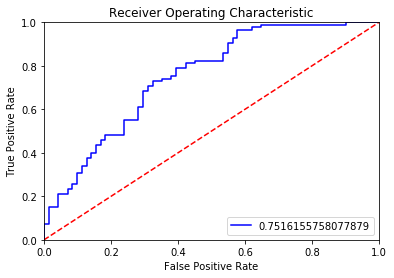

In [26]:
fpr, tpr, z = metrics.roc_curve(y_test, y_pred_prob_LR[:,1])
auc_LR = metrics.auc(fpr,tpr)
print(auc_LR)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc_LR)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

Here in <b>Logistic Regression</b> we get an accuracy of <b>71.79%</b> and auc score of <b>75.16%</b>

Since the model gave too many misclassifications we further move to our next model i.e. KNN.

### <i>K-Nearest Neigbor</i>

In [27]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 3)
KNN_classifier.fit(x_train, y_train)
y_pred_KNN = KNN_classifier.predict(x_test)
print(y_pred_KNN)

[1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0
 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1
 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0
 1 0 0 1 0 0 1 0]


#### Confusion matrix, Classification report and Accuracy of K-Nearest Neighbor

In [28]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_KNN))
print("Accuracy:",accuracy_score(y_test, y_pred_KNN))
print("Precision:", precision_score(y_test, y_pred_KNN))
print("Recall:", recall_score(y_test, y_pred_KNN))
print("Classification Report:")
print(classification_report(y_test, y_pred_KNN))

Confusion Matrix:
[[44 27]
 [11 74]]
Accuracy: 0.7564102564102564
Precision: 0.7326732673267327
Recall: 0.8705882352941177
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        71
           1       0.73      0.87      0.80        85

    accuracy                           0.76       156
   macro avg       0.77      0.75      0.75       156
weighted avg       0.76      0.76      0.75       156



#### ROC - AUC of K-Nearest Neighbor

0.7451532725766363


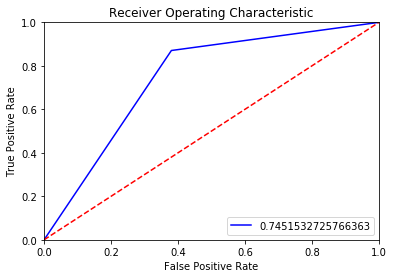

In [29]:
fpr_KNN, tpr_KNN, z = metrics.roc_curve(y_test, y_pred_KNN)
auc_KNN = metrics.auc(fpr_KNN,tpr_KNN)
print(auc_KNN)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_KNN, tpr_KNN, 'b', label = auc_KNN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

Here in <b>K-Nearest Neighbor</b> we get an accuracy of <b>75.64%</b> and auc score of <b>74.51%</b>

Here we got less errors than Logistic Regression but more type 2 errors which can prove fatal. Therefore, we move on to our next algorithm which is SVM.

### <i>Support Vector Machine</i>

In [30]:
SVC_classifier = SVC(C=1)
SVC_classifier.fit(x_train, y_train)
y_pred_SVC = SVC_classifier.predict(x_test)
print(y_pred_SVC)

[1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0
 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 1 0 1 0]


#### Confusion matrix, Classification report and Accuracy of Support Vector Machine

In [31]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_SVC))
print("Accuracy:",accuracy_score(y_test, y_pred_SVC))
print("Precision:", precision_score(y_test, y_pred_SVC))
print("Recall:", recall_score(y_test, y_pred_SVC))
print("Classification Report:")
print(classification_report(y_test, y_pred_SVC))

Confusion Matrix:
[[38 33]
 [ 8 77]]
Accuracy: 0.7371794871794872
Precision: 0.7
Recall: 0.9058823529411765
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.54      0.65        71
           1       0.70      0.91      0.79        85

    accuracy                           0.74       156
   macro avg       0.76      0.72      0.72       156
weighted avg       0.76      0.74      0.73       156



#### ROC - AUC of Support Vector Machine

0.7205468102734051


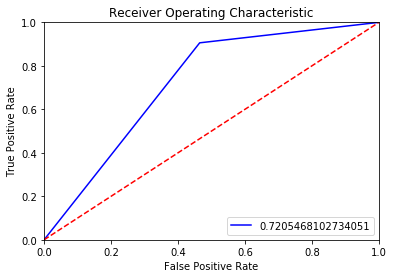

In [32]:
fpr_SVC, tpr_SVC, z = metrics.roc_curve(y_test, y_pred_SVC)
auc_SVC = metrics.auc(fpr_SVC,tpr_SVC)
print(auc_SVC)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_SVC, tpr_SVC, 'b', label = auc_SVC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

Here in <b>SVM</b> we get an accuracy of <b>73.71%</b> and auc score of <b>72.05%</b>

It can prove to be a good predictor but yet we can further apply some more algorithms to get a better accuracy & less number of errors.  So, we further proceed to our next model which is Random Forest.

### <i>Random Forest</i>

In [33]:
RF_classifier = RandomForestClassifier(n_estimators=1000,criterion="entropy",min_samples_split=2,random_state=0)
RF_classifier.fit(x_train, y_train)
y_pred_RF = RF_classifier.predict(x_test)
print(y_pred_RF)

[1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0
 1 0 0 1 1 0 1 0]


#### Confusion matrix, Classification report and Accuracy of Random Forest

In [34]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_RF))
print("Accuracy:",accuracy_score(y_test, y_pred_RF))
print("Precision:", precision_score(y_test, y_pred_RF))
print("Recall:", recall_score(y_test, y_pred_RF))
print("Classification Report:")
print(classification_report(y_test, y_pred_RF))

Confusion Matrix:
[[49 22]
 [ 4 81]]
Accuracy: 0.8333333333333334
Precision: 0.7864077669902912
Recall: 0.9529411764705882
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        71
           1       0.79      0.95      0.86        85

    accuracy                           0.83       156
   macro avg       0.86      0.82      0.83       156
weighted avg       0.85      0.83      0.83       156



#### ROC - AUC of Random Forest

0.8215410107705052


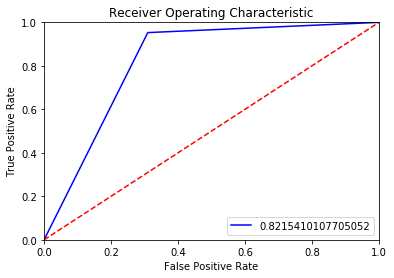

In [35]:
fpr_RF, tpr_RF, z = metrics.roc_curve(y_test, y_pred_RF)
auc_RF = metrics.auc(fpr_RF,tpr_RF)
print(auc_RF)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_RF, tpr_RF, 'b', label = auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

Here in <b>Random Forest</b> we get an accuracy of <b>83.33%</b> and auc score of <b>82.15%</b>

It can prove to be a better predictor but yet we can further apply some more algorithms to get a better accuracy & less number of errors.  So, we further proceed to our next model which is XG Boost.

### <i>XGBoost</i>

In [36]:
XGB = XGBClassifier(n_estimators=10000)
XGB.fit(x_train, y_train)
y_pred_XGB = XGB.predict(x_test)
print(y_pred_XGB)

[1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0
 1 0 0 1 1 0 1 0]


#### Confusion matrix, Classification report and Accuracy of XGBoost

In [37]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_XGB))
print("Accuracy:",accuracy_score(y_test, y_pred_XGB))
print("Precision:", precision_score(y_test, y_pred_XGB))
print("Recall:", recall_score(y_test, y_pred_XGB))
print("Classification Report:")
print(classification_report(y_test, y_pred_XGB))

Confusion Matrix:
[[54 17]
 [ 5 80]]
Accuracy: 0.8589743589743589
Precision: 0.8247422680412371
Recall: 0.9411764705882353
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        71
           1       0.82      0.94      0.88        85

    accuracy                           0.86       156
   macro avg       0.87      0.85      0.85       156
weighted avg       0.87      0.86      0.86       156



#### ROC - AUC of XGBoost

0.8508699254349626


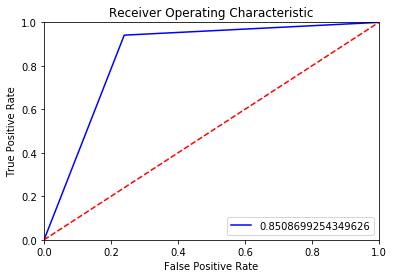

In [38]:
fpr_XGB, tpr_XGB, z = metrics.roc_curve(y_test, y_pred_XGB)
auc_XGB = metrics.auc(fpr_XGB,tpr_XGB)
print(auc_XGB)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_XGB, tpr_XGB, 'b', label = auc_XGB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

Here in <b>XGBoost</b> we get an accuracy of <b>85.89%</b> and auc score of <b>85.08%</b>

Here we got very less type 2 errors & also less amount of missclassifications compared to all the previous algorithms which led us to a significant accuracy.

## <i>Comparison of models</i>

In [39]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression','K-Nearest Neighbor','Support Vector Machine','Random Forest', 'XGBoost'],
    'Accuracy Score': [accuracy_score(y_test, y_pred_LR), accuracy_score(y_test, y_pred_KNN), 
                       accuracy_score(y_test, y_pred_SVC),accuracy_score(y_test, y_pred_RF),
                       accuracy_score(y_test, y_pred_XGB)],
    'Precision Score': [precision_score(y_test, y_pred_LR), precision_score(y_test, y_pred_KNN), 
                        precision_score(y_test, y_pred_SVC),precision_score(y_test, y_pred_RF),
                        precision_score(y_test, y_pred_XGB)],
    'Recall Score' : [recall_score(y_test, y_pred_LR), recall_score(y_test, y_pred_KNN), 
                      recall_score(y_test, y_pred_SVC),recall_score(y_test, y_pred_RF),
                      recall_score(y_test, y_pred_XGB)],
    'AUC Score' : [auc_LR, auc_KNN, auc_SVC, auc_RF, auc_XGB]})
models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score,Precision Score,Recall Score,AUC Score
4,XGBoost,0.858974,0.824742,0.941176,0.850870
3,Random Forest,0.833333,0.786408,0.952941,0.821541
1,K-Nearest Neighbor,0.756410,0.732673,0.870588,0.745153
2,Support Vector Machine,0.737179,0.700000,0.905882,0.720547
0,Logistic Regression,0.717949,0.666667,0.964706,0.751616


#### ROC-AUC scores of models

AUC Score
Logistic Regression = 0.7516155758077879
K-Nearest Neighbour =  0.7451532725766363
Support Vector Machine =  0.7205468102734051
Random Forest =  0.8215410107705052
XGBoost = 0.8508699254349626


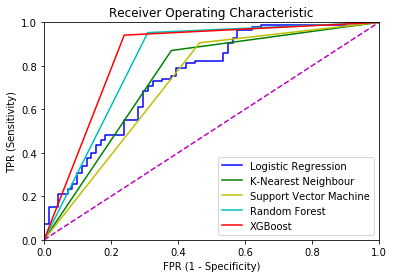

In [40]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Logistic Regression')
plt.plot(fpr_KNN, tpr_KNN, 'g', label = 'K-Nearest Neighbour')
plt.plot(fpr_SVC, tpr_SVC, 'y', label = 'Support Vector Machine')
plt.plot(fpr_RF, tpr_RF, 'c', label = 'Random Forest')
plt.plot(fpr_XGB, tpr_XGB, 'r', label = 'XGBoost')
print('AUC Score')
print('Logistic Regression =', auc_LR)
print('K-Nearest Neighbour = ', auc_KNN)
print('Support Vector Machine = ',auc_SVC)
print('Random Forest = ',auc_RF)
print('XGBoost =', auc_XGB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'m--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('FPR (1 - Specificity)')
plt.ylabel('TPR (Sensitivity)')

plt.show()

## Conclusion

Summarizing all the above parameters, other models in three out of the four parameters, i.e. Accuracy, Precision score, AUC score. In Recall score also, it proves to be the third best model. Hence, based on these results we can conclude that, XGBoost will be the best model to predict whether a person will have a Liver disease or not.